# iSCAT Analysis Tutorial

This notebook demonstrates:

**Simulation**
* Simulating multiple tracks with different diffusion models

**Analysis**
* Apparent Diffusion Coefficient (ADC) analysis of a single track
* ADC analysis of multiple tracks at once
* Retreiving analysis results using `adc_summary`
* Retreiving tracks that fit a certain diffusion category

## Simulation with `trait2d.simulators`

First, import the required simulators:

In [1]:
from trait2d.simulators import BrownianDiffusion
from trait2d.simulators import HoppingDiffusion

A simulator can be initialised with different parameters. For Brownian diffusion, this looks as follows:

In [2]:
params = dict()
params["Tmax"] = 1.0 # Maximum simulation time (s)
params["dt"] = 1e-4 # Simulation time resolution (s)
params["dL"] = 1e-12 # Simulation spatial resolution (m)
params["d"] = 1e-12 # Diffusion coefficient (m^2/s)
params["L"] = 1e-5 # Simulation domain size (m)
params["seed"] = 42 # Seed to initialize the random generator (for reproducibility)
params["quantize"] = False # Quantize the position to the simulation spatial resolution grid.

simulator_brownian = BrownianDiffusion(**params)

Other simulators, like hop diffusion, expect different parameters:

In [3]:
params = dict()
params["Tmax"] = 1.0 # Maximum simulation time (s)
params["dt"] = 1e-4 # Simulation time resolution (s)
params["dL"] = 1e-8 # Simulation spatial resolution (m)
params["Df"] = 8e-13 # Free diffusion coefficient [m^2/s]
params["L"] = 1e-5 # Simulation domain size (m)
params["HP"] = 0.01 # Hopping probability [0-1]
params["HL"] = 1e-6 # Average compartment diameter/length [m]
params["seed"] = 42 # Seed to initialize the random generator (for reproducibility)
params["quantize"] = False # Quantize the position to the simulation spatial resolution grid.

simulator_hop = HoppingDiffusion(**params)

After initialisation, the simulations can be run. Results will be stored in the simulator.

In [4]:
simulator_brownian.run()
simulator_hop.run()

Brownian Diffusion Simulation: 100%|██████████| 10000/10000 [00:00<00:00, 165996.00it/s]
Simulation: 10001it [00:00, 115368.97it/s]           


The resulting trajectories can be plotted:

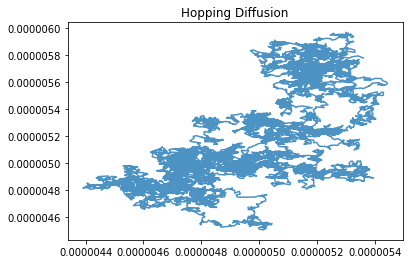

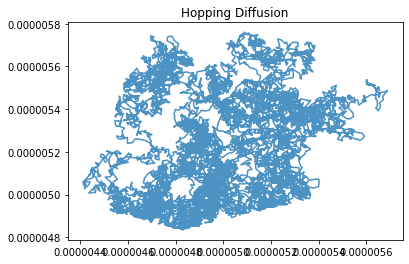

In [5]:
simulator_brownian.display_trajectory()
simulator_hop.display_trajectory()

It is also possible to export the simulated tracks as videos using the `trait2d.simulators.iscat_movie` class. Currently, the tracks need first to be saved e.g. as a `.csv` using `BrownianDiffusion.save()` (or any other Diffusion model) and then load them again using `iscat_movie.load_tracks()`. You also need to load a PSF with `iscat_movie.load_psf()`.

## Analysis using `trait2d.analysis`

Before we start fitting our data, we need to add some models. `trait2d.analysis.models` contains a few models that we can add to `ModelDB`. All models added this way will be used during analysis.

In [6]:
from trait2d.analysis import ModelDB
from trait2d.analysis.models import ModelBrownian, ModelConfined, ModelHop

ModelDB().add_model(ModelBrownian)
ModelDB().add_model(ModelConfined)
ModelDB().add_model(ModelHop)

Single tracks are stored in a `Track` object.

In [7]:
from trait2d.analysis import Track

We can create a single track from our last simulation:

In [8]:
single_track = Track.from_dict(simulator_brownian.trajectory)

We can now do ADC analysis on the track:

In [9]:
results = single_track.adc_analysis(fit_max_time=0.5e-1)

Analysis results like the calculated values for $D_{app}$, fit parameters and much more are returned in a dictionary. We can also retreive the dictionary of the last analysis at any time with `get_adc_analysis_results`.

In [10]:
fit_results = results["fit_results"]
best_model = results["best_model"]
print(fit_results)
print(best_model)

{'ModelBrownian': {'params': array([4.61729616e-13, 7.42301474e-09]), 'errors': array([1.20498612e-15, 1.52692582e-10]), 'bic': -56.1857445183913, 'rel_likelihood': 1.0}, 'ModelConfined': {'params': array([5.14578538e-22, 2.05516556e-08, 3.11382310e-13]), 'errors': array([2.40635582e-23, 1.36768962e-09, 0.00000000e+00]), 'bic': -50.59777366579063, 'rel_likelihood': 0.06117691134198208}, 'ModelHop': {'params': array([4.61727114e-13, 1.13113280e-22, 7.42627298e-09, 4.04912533e-16]), 'errors': array([1.20742302e-15, 0.00000000e+00, 1.52967869e-10, 0.00000000e+00]), 'bic': -56.18560107668011, 'rel_likelihood': 0.9999282817162815}}
ModelBrownian


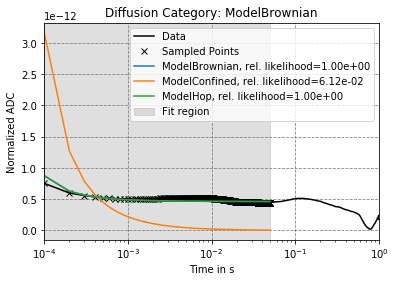

In [11]:
single_track.plot_adc_analysis_results()

Multiple `Track`s are then stored in a `ListOfTracks` object. 

In [12]:
from trait2d.analysis import ListOfTracks

For now, we just simulate some more tracks and create a single `ListOfTracks` from these tracks. Multiple tracks can also be loaded from a single file using `ListOfTracks.from_file()`.

In [13]:
import random
tracks = []
for i in range(10):
    simulator_brownian.run()
    simulator_hop.run()
    tracks.append(Track.from_dict(simulator_brownian.trajectory))
    tracks.append(Track.from_dict(simulator_hop.trajectory))
    
tracks = ListOfTracks(tracks)

Brownian Diffusion Simulation: 100%|██████████| 10000/10000 [00:00<00:00, 158998.01it/s]
Simulation: 10001it [00:00, 114093.39it/s]           
Brownian Diffusion Simulation: 100%|██████████| 10000/10000 [00:00<00:00, 165826.03it/s]
Simulation: 10001it [00:00, 111777.02it/s]           
Brownian Diffusion Simulation: 100%|██████████| 10000/10000 [00:00<00:00, 182243.77it/s]
Simulation: 10001it [00:00, 113689.54it/s]           
Brownian Diffusion Simulation: 100%|██████████| 10000/10000 [00:00<00:00, 175976.17it/s]
Simulation: 10001it [00:00, 111950.34it/s]           
Brownian Diffusion Simulation: 100%|██████████| 10000/10000 [00:00<00:00, 180058.64it/s]
Simulation: 10001it [00:00, 106894.81it/s]           
Brownian Diffusion Simulation: 100%|██████████| 10000/10000 [00:00<00:00, 178795.24it/s]
Simulation: 10001it [00:00, 113810.15it/s]           
Brownian Diffusion Simulation: 100%|██████████| 10000/10000 [00:00<00:00, 174482.77it/s]
Simulation: 10001it [00:00, 111760.05it/s]           

We can retreive single tracks either by their index in then `ListOfTracks` object using `get_track` of by their ID (should they have one) using `get_track_by_id`:

In order to set initial parameters or bounds for the fits, we need to modify the models inside `ModelDB`. These will then be applied during all analysis from this point on.

In [14]:
ModelDB().get_model(ModelBrownian).initial = fit_results["ModelBrownian"]["params"]
ModelDB().get_model(ModelConfined).initial = fit_results["ModelConfined"]["params"]
ModelDB().get_model(ModelHop).initial = fit_results["ModelHop"]["params"]

Here, we set all initial parameters to the results of our single fit from before.

Now that we set our initial guesses, let's analyse the remaining tracks at once.

Enabling logarithmic sampling is a good idea since the time axis will be scaled logarithmically by default. We can also set the maximum time on the time for which to fit.

`adc_analysis` will return a list containing the indices of all tracks for which a fit has failed. These can then be retreived with `get_track` and analysed further.

In [15]:
tracks.adc_analysis(fit_max_time=50e-3, enable_log_sampling=True)

[]

`adc_summary` gives an overview of the analysis results including optional plots, the averaged parameters for each model, the averaged MSD for each model and the averaged $D_{app}$ for each model.

(We need to set `interpolation = True` since some of the time differences in the simulated tracks deviate *slightly* from the expected value.)

/home/iscat/Desktop/iSCAT_tracking/trait2d/analysis/models.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return D + delta**2 / (2*t*(1-2*self.R*self.dt/t))
/home/iscat/Desktop/iSCAT_tracking/trait2d/analysis/models.py:20: RuntimeWarning: invalid value encountered in multiply
  return D + delta**2 / (2*t*(1-2*self.R*self.dt/t))
/home/iscat/Desktop/iSCAT_tracking/trait2d/analysis/models.py:42: RuntimeWarning: divide by zero encountered in true_divide
  D_micro * (tau/t) * (1 - np.exp(-tau/t)) + \
/home/iscat/Desktop/iSCAT_tracking/trait2d/analysis/models.py:43: RuntimeWarning: divide by zero encountered in true_divide
  delta ** 2 / (2 * t * (1 - 2 * self.R * self.dt / t))
/home/iscat/Desktop/iSCAT_tracking/trait2d/analysis/models.py:43: RuntimeWarning: invalid value encountered in multiply
  delta ** 2 / (2 * t * (1 - 2 * self.R * self.dt / t))


{'sectors': {'ModelBrownian': 0.5, 'ModelHop': 0.5, 'not catergorized': 0.0},
 'average_params': {'ModelBrownian': array([6.06789626e-13, 7.09815269e-09]),
  'ModelHop': array([5.96632330e-13, 1.86542036e-05, 6.16556145e-09, 1.62533491e-06])},
 'average_msd': {'ModelBrownian': array([2.58663428e-16, 5.16720425e-16, 7.74781526e-16, ...,
         2.09855596e-12, 2.09915903e-12, 2.42651954e-12]),
  'ModelHop': array([2.59650087e-16, 5.16979719e-16, 7.75972984e-16, ...,
         1.50136805e-12, 1.50248571e-12, 1.41180107e-12])},
 'average_dapp': {'ModelBrownian': array([9.69928572e-13, 7.75016311e-13, 7.26292754e-13, ...,
         5.24813952e-13, 5.24912256e-13, 6.06710793e-13]),
  'ModelHop': array([9.73628119e-13, 7.75405188e-13, 7.27409623e-13, ...,
         3.75467187e-13, 3.75709107e-13, 3.52997342e-13])}}

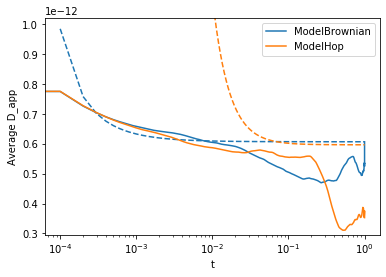

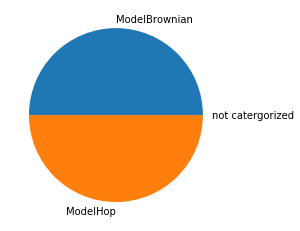

In [16]:
tracks.adc_summary(plot_dapp=True, plot_pie_chart=True, interpolation=True)

Now that analysis is done we can also retrieve all tracks that fit a certain diffusion category best:

/home/iscat/Desktop/iSCAT_tracking/trait2d/analysis/models.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return D + delta**2 / (2*t*(1-2*self.R*self.dt/t))
/home/iscat/Desktop/iSCAT_tracking/trait2d/analysis/models.py:20: RuntimeWarning: invalid value encountered in multiply
  return D + delta**2 / (2*t*(1-2*self.R*self.dt/t))


{'sectors': {'ModelBrownian': 1.0, 'not catergorized': 0.0},
 'average_params': {'ModelBrownian': array([6.06789626e-13, 7.09815269e-09])},
 'average_msd': {'ModelBrownian': array([2.58663428e-16, 5.16720425e-16, 7.74781526e-16, ...,
         2.09855596e-12, 2.09915903e-12, 2.42651954e-12])},
 'average_dapp': {'ModelBrownian': array([9.69928572e-13, 7.75016311e-13, 7.26292754e-13, ...,
         5.24813952e-13, 5.24912256e-13, 6.06710793e-13])}}

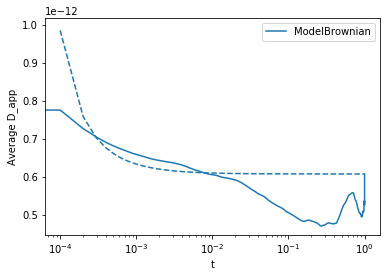

In [17]:
tracks_brownian = tracks.get_sublist(method="adc", model=ModelBrownian)
tracks_brownian.adc_summary(plot_dapp=True, interpolation=True)

As mentioned before, we can retreive the analysis results for any track, at any time:

In [18]:
tracks_brownian.get_track(5).get_adc_analysis_results()

{'Dapp': array([7.56358183e-13, 6.06092196e-13, 5.67500358e-13, ...,
        1.15814333e-12, 1.15709149e-12, 1.15453839e-12]),
 'fit_indices': [0, 1, 3, 6, 11, 19, 31, 50, 80, 128, 204, 324],
 'fit_results': {'ModelBrownian': {'params': array([5.11962133e-13, 5.71499283e-09]),
   'errors': array([8.82395317e-15, 1.87774430e-10]),
   'bic': -60.261928230680255,
   'rel_likelihood': 1.0},
  'ModelConfined': {'params': array([1.74423955e-17, 1.25757681e-08, 1.47872676e-16]),
   'errors': array([0.00000000e+00, 8.90518938e-09, 1.13349362e+05]),
   'bic': -54.35440299534695,
   'rel_likelihood': 0.052143141676166634},
  'ModelHop': {'params': array([5.11979544e-13, 2.96867968e-12, 5.70892127e-09, 1.37135717e-06]),
   'errors': array([1.32742055e-14, 9.38471992e-07, 2.13491336e-09, 2.16784732e-01]),
   'bic': -60.26182860928346,
   'rel_likelihood': 0.9999501905421361}},
 'best_model': 'ModelBrownian'}

We can also plot them:

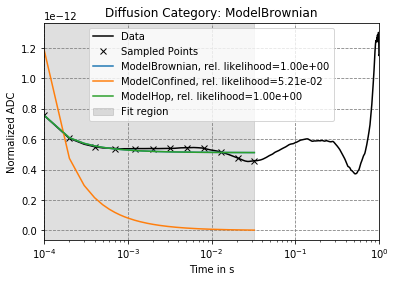

In [19]:
tracks_brownian.get_track(5).plot_adc_analysis_results()